## Instagram crawling_강릉맛집

## 전처리


In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud    # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/System/Applications/Font Book/AppleGothic.ttf"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd

df_insta = pd.DataFrame([])

folder = '/content/drive/MyDrive/Colab Notebooks/'
f_list = ['crawling_GangneungGwanGwang.xlsx', 
          'crawling_GangneungTour.xlsx',
          '210708_crawling_Gangneung.xlsx']

for f_name in f_list:
    f_path = folder + f_name
    temp = pd.read_excel(f_path)
    df_insta = df_insta.append(temp)

df_insta.columns = ['content', 'date', 'like', 'place', 'tags']
df_insta.head()



,content,date,like,place,tags
0,경포호 일출경포대에서 일출보다#경포호일출 #경포일출 #경포호수일출 #강릉일출 #강릉...,2019-12-16,133,NaN,"['#경포호일출', '#경포일출', '#경포호수일출', '#강릉일출', '#강릉여행..."
1,#Curling⠀#First Curling in My Life ⠀#난생 #처음 #컬...,2019-08-03,197,강릉 빙상경기장,"['#Curling⠀', '#First', '#난생', '#처음', '#컬링⠀', ..."
2,🛍강릉 관광 활성화 아이디어 공모전🎡시험 기간에 공부하다가 지루해서 공모전 사이트 ...,2020-12-29,309,강릉,"['#강릉관광', '#관광아이디어', '#아이디어공모전']"
3,충분한 휴식을 즐기고 계시나요?-포이푸의 소나무숲에서 정화된 맑은 공기와 피톤치드는...,2020-08-13,130,세인트존스호텔,"['#세인트존스호텔', '#강원도서핑', '#포이푸', '#poipu', '#포이푸..."
4,짙은 밤... 경포는 심장 깊숙히 스며든다.※숨은그림~~첫번째 사진에서 재두루미를 ...,2019-12-20,138,NaN,"['#경포호', '#경포호야경', '#경포호수', '#시마크호텔', '#세인트존스호..."


In [ ]:
# drop_duplicates

df_insta.drop_duplicates(subset= ['content'], inplace = True)

df_insta.to_excel('./20210712_crawling_raw.xlsx', index = False)


## 해쉬태그 wordcloud


In [ ]:
df = pd.read_excel('./20210712_crawling_raw.xlsx')
df

In [ ]:
df['tags'].head()

0    ['#경포호일출', '#경포일출', '#경포호수일출', '#강릉일출', '#강릉여행...
1    ['#Curling⠀', '#First', '#난생', '#처음', '#컬링⠀', ...
2                     ['#강릉관광', '#관광아이디어', '#아이디어공모전']
3    ['#세인트존스호텔', '#강원도서핑', '#포이푸', '#poipu', '#포이푸...
4    ['#경포호', '#경포호야경', '#경포호수', '#시마크호텔', '#세인트존스호...
Name: tags, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  768 non-null    object
 1   date     768 non-null    object
 2   like     768 non-null    object
 3   place    427 non-null    object
 4   tags     768 non-null    object
dtypes: object(5)
memory usage: 30.1+ KB


In [ ]:
# remove [''] in hashtags

tags_total = []

for tags in df['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

tags_total

In [ ]:
# generating wordcloud

from collections import Counter

tags_counts = Counter(tags_total)


In [ ]:
tags_counts

In [ ]:
tags_counts.most_common(50)

In [ ]:
stopwords = ['', '#맞팔', '#일상', '#이태원']

tags_selected = []
for tag in tags_total:
    if tag not in stopwords:
        tags_selected.append(tag)

tags_selected_counted = Counter(tags_selected)
tags_selected_counted.most_common(80)


In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

tags_counts_df = pd.DataFrame(tags_selected_counted.most_common(80))
tags_counts_df

In [ ]:
tags_counts_df.columns = ['tag', 'counts']
tags_counts_df

In [ ]:
tags_selected_counted

## Visualization

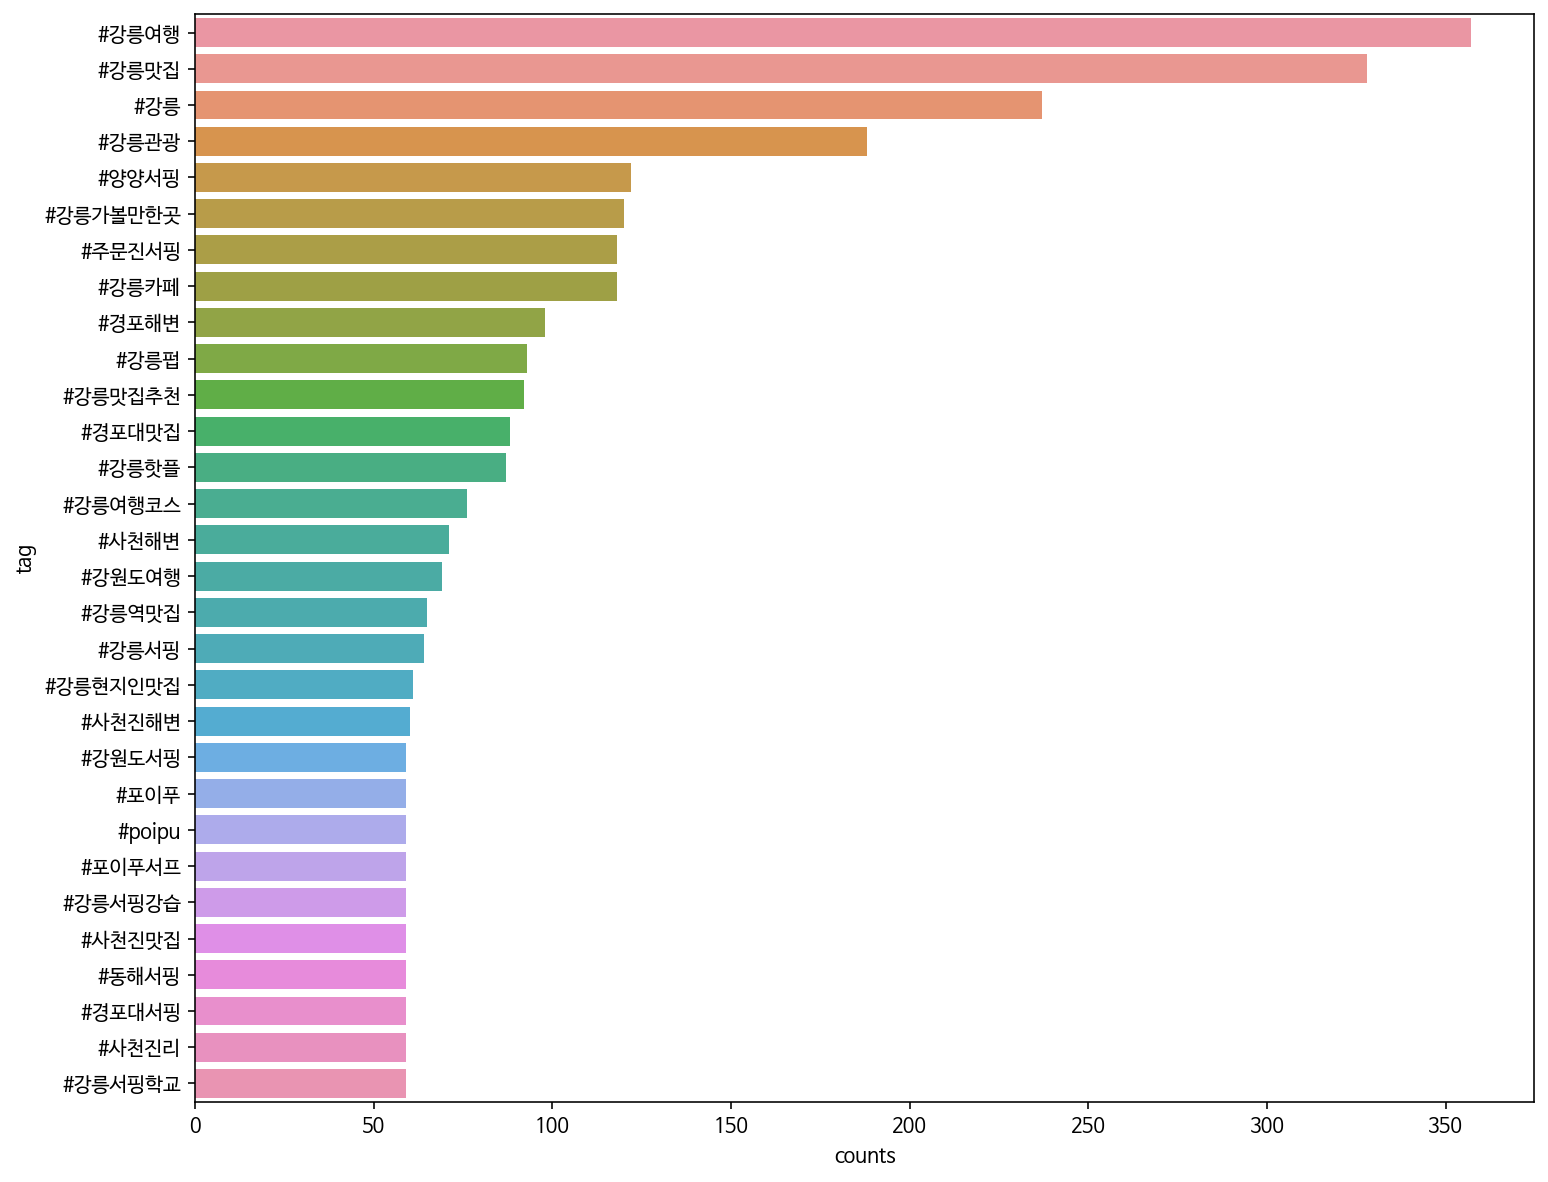

In [ ]:
# bar graph

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 10))
sns.barplot(x = 'counts', y = 'tag', data = tags_counts_df[:30])
plt.show()


In [ ]:
# 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [ ]:
tags_selected_counted

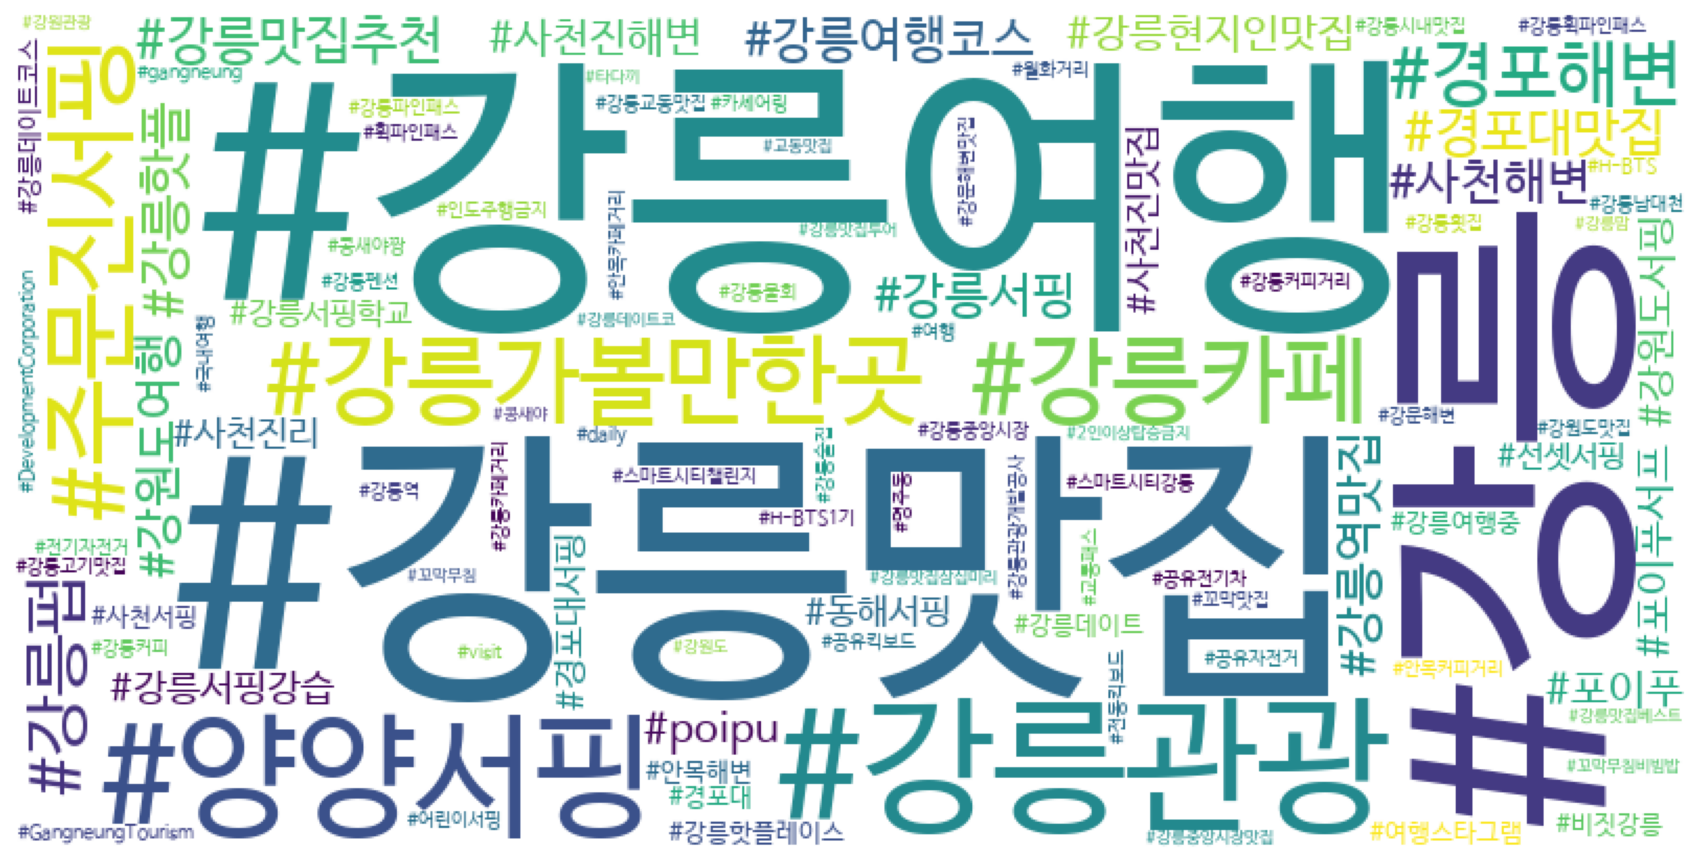

In [ ]:
# wordcloud

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path = fontpath, background_color = 'white',
                      width = 800, 
                      height = 400,
                      max_words = 100,
                      relative_scaling = 0.3)

wordcloud.generate_from_frequencies(tags_selected_counted)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./210712_wordcloud.png')

## 장소

In [ ]:
df = pd.read_excel('./20210712_crawling_raw.xlsx')
df

,content,date,like,place,tags
0,경포호 일출경포대에서 일출보다#경포호일출 #경포일출 #경포호수일출 #강릉일출 #강릉...,2019-12-16,133,NaN,"['#경포호일출', '#경포일출', '#경포호수일출', '#강릉일출', '#강릉여행..."
1,#Curling⠀#First Curling in My Life ⠀#난생 #처음 #컬...,2019-08-03,197,강릉 빙상경기장,"['#Curling⠀', '#First', '#난생', '#처음', '#컬링⠀', ..."
2,🛍강릉 관광 활성화 아이디어 공모전🎡시험 기간에 공부하다가 지루해서 공모전 사이트 ...,2020-12-29,309,강릉,"['#강릉관광', '#관광아이디어', '#아이디어공모전']"
3,충분한 휴식을 즐기고 계시나요?-포이푸의 소나무숲에서 정화된 맑은 공기와 피톤치드는...,2020-08-13,130,세인트존스호텔,"['#세인트존스호텔', '#강원도서핑', '#포이푸', '#poipu', '#포이푸..."
4,짙은 밤... 경포는 심장 깊숙히 스며든다.※숨은그림~~첫번째 사진에서 재두루미를 ...,2019-12-20,138,NaN,"['#경포호', '#경포호야경', '#경포호수', '#시마크호텔', '#세인트존스호..."
...,...,...,...,...,...
763,"7월, 8월 한정 원데이클래스 #여름의그릇 오픈합니다. 무더운 여름을 시원한 무드의...",2021-07-08,22,슬로우슬로우담담,['#여름의그릇']
764,가성비 진짜 끝판왕!!!#강릉맛집해마루..해마루강원 강릉시 공항길 127번길 640...,2021-07-08,2,강원도 강릉시,"['#강릉맛집해마루..해마루강원', '#강릉맛집', '#강릉회포장', '#강릉횟집'..."
765,스시코우의 #우럭조림우럭조림은 생강과 해초랑 그리고 생선 가운데 뼈를 발라서 살과 ...,2021-07-08,56,스시코우,['#우럭조림우럭조림은']
766,#르블레도르오후의 홍차와 빅토리아 케익😊강릉에 올때면 항상 들르는 진짜 프랑스 베이...,2021-07-08,32,NaN,['#르블레도르오후의']


In [ ]:
df['place'].head()

0         NaN
1    강릉 빙상경기장
2          강릉
3     세인트존스호텔
4         NaN
Name: place, dtype: object

In [ ]:
place_total = df['place'].dropna()
place_total

1       강릉 빙상경기장
2             강릉
3        세인트존스호텔
5            사천면
6             강릉
         ...    
757        소돌다락방
762    Gangneung
763     슬로우슬로우담담
764      강원도 강릉시
765         스시코우
Name: place, Length: 427, dtype: object

In [ ]:
from collections import Counter

place_counts = Counter(place_total)

In [ ]:
place_counts.most_common(50)

In [ ]:
from wordcloud import WordCloud

place_counts_df = pd.DataFrame(place_counts.most_common(50))
place_counts_df

In [ ]:
place_counts_df.columns = ['place', 'counts']
place_counts_df

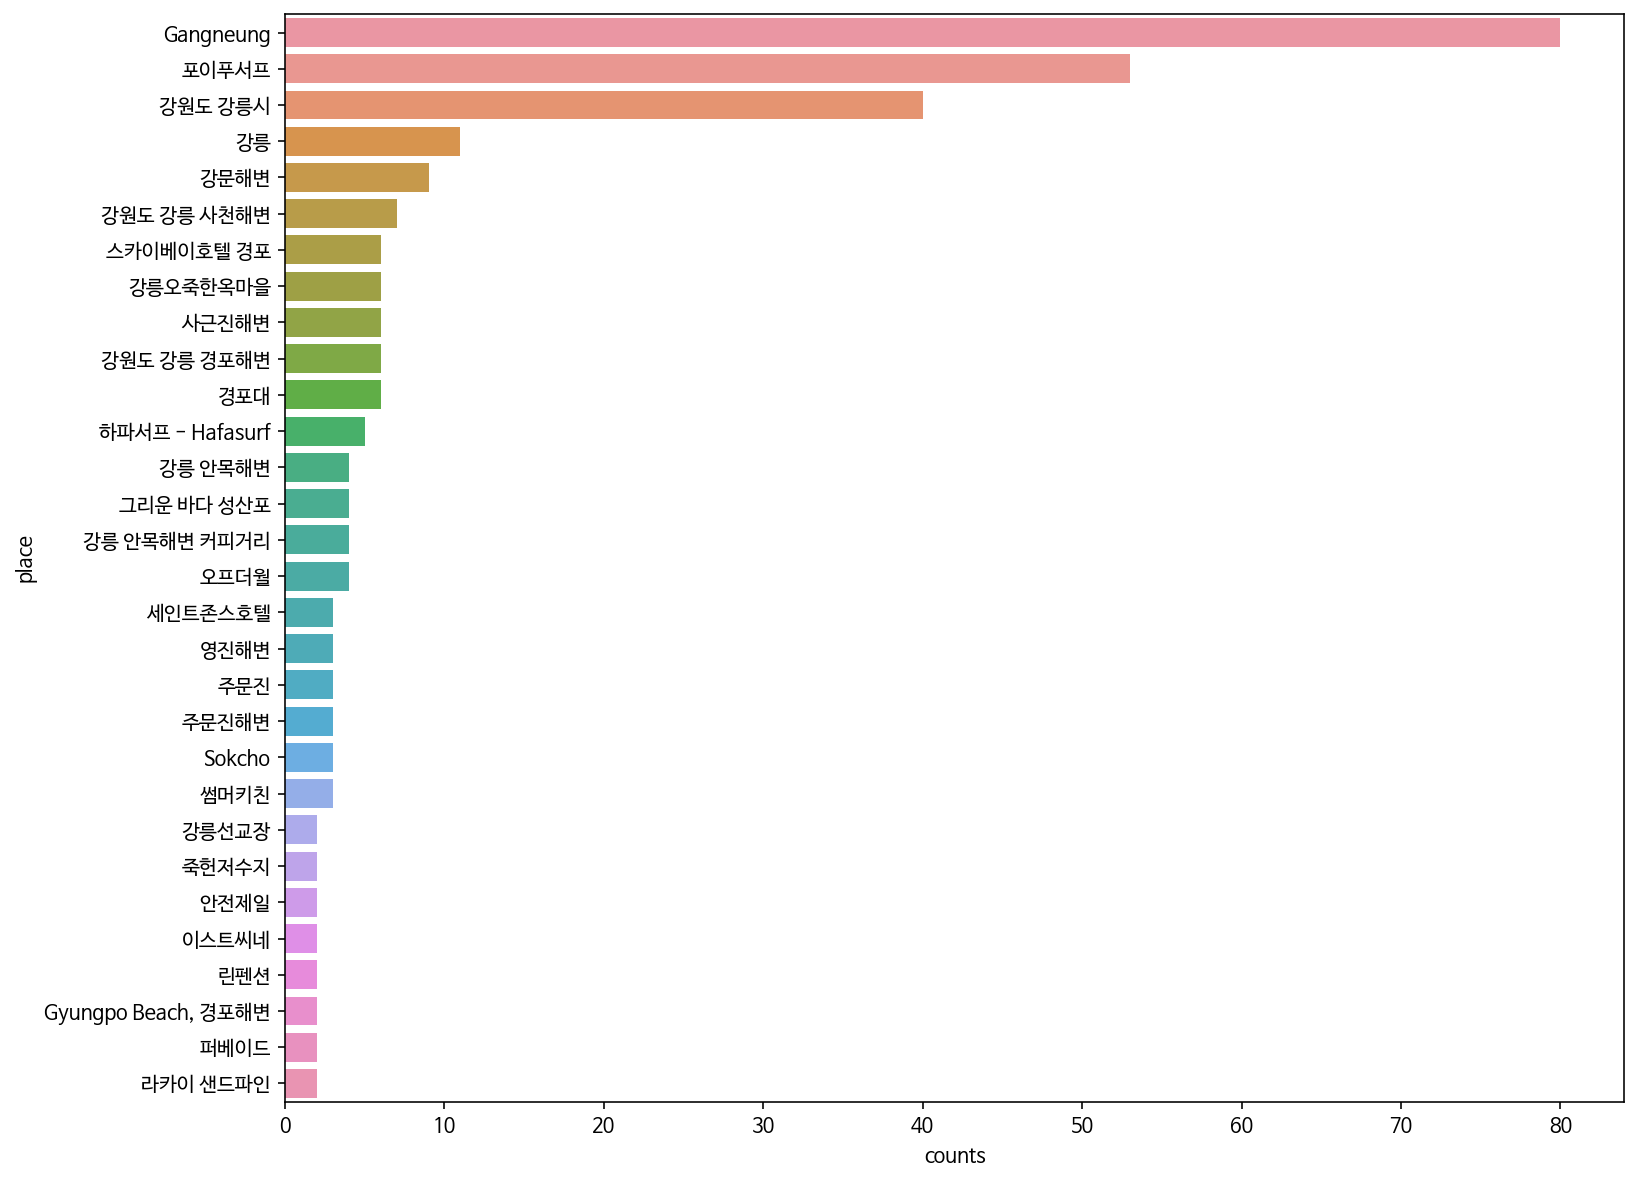

In [ ]:
# bar graph

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 10))
sns.barplot(x = 'counts', y = 'place', data = place_counts_df[:30])
plt.show()

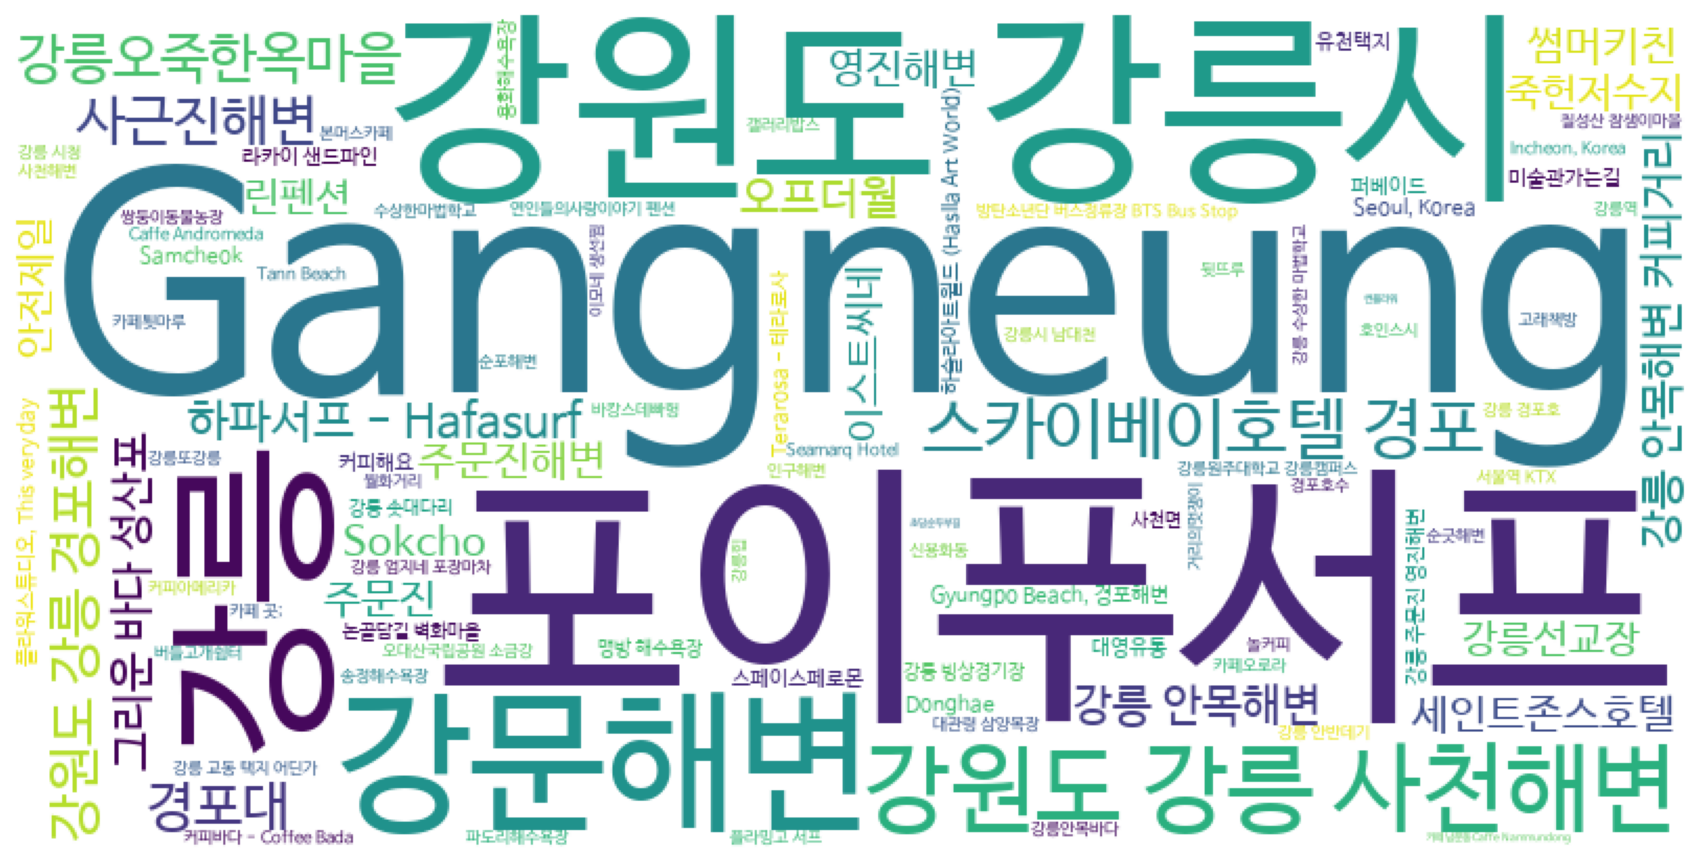

In [ ]:
# wordcloud

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path = fontpath, background_color = 'white',
                      width = 800, 
                      height = 400,
                      max_words = 100,
                      relative_scaling = 0.2)

wordcloud.generate_from_frequencies(place_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./210712_place_wordcloud.png')

## likes

In [ ]:
df = pd.read_excel('./20210712_crawling_raw.xlsx')
df

,content,date,like,place,tags
0,경포호 일출경포대에서 일출보다#경포호일출 #경포일출 #경포호수일출 #강릉일출 #강릉...,2019-12-16,133,NaN,"['#경포호일출', '#경포일출', '#경포호수일출', '#강릉일출', '#강릉여행..."
1,#Curling⠀#First Curling in My Life ⠀#난생 #처음 #컬...,2019-08-03,197,강릉 빙상경기장,"['#Curling⠀', '#First', '#난생', '#처음', '#컬링⠀', ..."
2,🛍강릉 관광 활성화 아이디어 공모전🎡시험 기간에 공부하다가 지루해서 공모전 사이트 ...,2020-12-29,309,강릉,"['#강릉관광', '#관광아이디어', '#아이디어공모전']"
3,충분한 휴식을 즐기고 계시나요?-포이푸의 소나무숲에서 정화된 맑은 공기와 피톤치드는...,2020-08-13,130,세인트존스호텔,"['#세인트존스호텔', '#강원도서핑', '#포이푸', '#poipu', '#포이푸..."
4,짙은 밤... 경포는 심장 깊숙히 스며든다.※숨은그림~~첫번째 사진에서 재두루미를 ...,2019-12-20,138,NaN,"['#경포호', '#경포호야경', '#경포호수', '#시마크호텔', '#세인트존스호..."
...,...,...,...,...,...
763,"7월, 8월 한정 원데이클래스 #여름의그릇 오픈합니다. 무더운 여름을 시원한 무드의...",2021-07-08,22,슬로우슬로우담담,['#여름의그릇']
764,가성비 진짜 끝판왕!!!#강릉맛집해마루..해마루강원 강릉시 공항길 127번길 640...,2021-07-08,2,강원도 강릉시,"['#강릉맛집해마루..해마루강원', '#강릉맛집', '#강릉회포장', '#강릉횟집'..."
765,스시코우의 #우럭조림우럭조림은 생강과 해초랑 그리고 생선 가운데 뼈를 발라서 살과 ...,2021-07-08,56,스시코우,['#우럭조림우럭조림은']
766,#르블레도르오후의 홍차와 빅토리아 케익😊강릉에 올때면 항상 들르는 진짜 프랑스 베이...,2021-07-08,32,NaN,['#르블레도르오후의']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  768 non-null    object
 1   date     768 non-null    object
 2   like     768 non-null    object
 3   place    427 non-null    object
 4   tags     768 non-null    object
dtypes: object(5)
memory usage: 30.1+ KB


In [ ]:
df['like'] = df['like'].dropna()


In [ ]:
df['like'].unique()

array([133, 197, 309, 130, 138, 124, 567, 145, 285, 0, 12, 2, 3, 4, 5, 51,
       21, 37, 17, 39, 6, 98, 25, 36, 10, 90, 34, 28, 43, 29, 54, 27, 80,
       63, 104, 47, 83, 52, 18, 68, 30, 86, 159, 48, 33, 75, 71, 69, 89,
       57, 56, 23, 15, 9, 8, 13, 11, 62, 65, 87, 22, 44, 194, 105, 35, 73,
       112, 16, 153, 76, 40, 7, 26, 79, 58, 116, 74, 20, 137, 72, 91, 78,
       216, 49, 45, 46, 32, 38, 136, 132, 814, 77, 41, 66, 88, 24, 31, 64,
       92, 94, 84, '1,015', '1,880', '428', '219', '4,538', '213', '183',
       '339', '142', '7', '16', '5', '6', '2', '17', '13', '14', '15',
       '20', '10', '9', '8', '29', '119', '44', '4', '55', '37', '3',
       '27', '11', '24', '225', '23', '60', '26', '208', '103', '22',
       '61', '18', '36', '35', '30', '39', '33', '19', '21', '51', '32',
       '50', '46', '58', '78', '282', '314', '309', '31', '64', '41',
       '69', '42', '156', '53', '40', '34', '513', '79', '434', '62',
       '360', '48', '89', '70', '127', '45', '627', '124

In [ ]:
s = ['123명', '12', '명명명']
for i in range(len(s)) : 
    s[i]=s[i].replace('명', '')
    
print(s)

['']


In [ ]:

stopwords = ['', '#맞팔', '#일상', '#이태원']

tags_selected = []
for tag in tags_total:
    if tag not in stopwords:
        tags_selected.append(tag)

In [ ]:
# remove [''] in like
df['like'].str.replace("''", '', regex=True)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
763     22
764      2
765     56
766     32
767      6
Name: like, Length: 768, dtype: object

In [ ]:
df['like'] = df['like'].astype(float)

ValueError: ignored

In [ ]:
df.sort_values(by = 'like', ascending = False)

TypeError: ignored